# Comparing Changes 

### US/Mexico level 1 - states

In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
df = gpd.read_parquet("../../geoplanar/datasets/usmex/usmex_1.parquet")

In [3]:
df2 = gpd.read_parquet("../../geoplanar/datasets/usmex/final_usmex1.parquet")

## Changes in Centroids

In [4]:
old_cen = df.centroid
old_cen.head()

/Users/ecv/mambaforge/envs/geoplanar_docs/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


0    POINT (-102.36194 22.00644)
1    POINT (-115.09356 30.55562)
2    POINT (-112.04916 25.92125)
3     POINT (-90.31599 18.84861)
4     POINT (-92.46324 16.48400)
dtype: geometry

In [5]:
new_cen = df2.centroid
new_cen.head()

/Users/ecv/mambaforge/envs/geoplanar_docs/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


0    POINT (-102.36194 22.00644)
1    POINT (-115.09356 30.55562)
2    POINT (-112.04916 25.92125)
3     POINT (-90.31599 18.84861)
4     POINT (-92.46324 16.48400)
dtype: geometry

In [6]:
print(old_cen.iloc[73]) # old texas centroid

POINT (-99.3579843873821 31.491054180383436)


In [7]:
print(new_cen.iloc[73]) # new texas centroid

POINT (-99.3580908642637 31.491283649849844)


<AxesSubplot:>

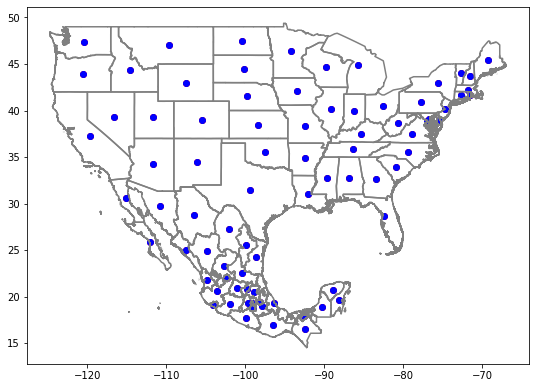

In [8]:
base = df2.geometry.boundary.plot(edgecolor='grey', figsize=(9, 9))
old_cen.plot(ax=base, color='red')
new_cen.plot(ax=base, color='blue')

In [9]:
import folium
# old centroids
m = old_cen.explore(
     color='red',
     tiles="CartoDB positron", # use "CartoDB positron" tiles
     name = 'Old Centroids'
)

# new centroids
new_cen.explore(
     m=m, # pass the map object
     color='blue',
     tooltip=False,
     name = 'New Centroids'
)

folium.LayerControl().add_to(m)  # layer control

m # execute the map

### Comparing old and new centroids
We will use the different geom comparsions that GeoPandas has to spot the differences in centroids

In [10]:
# geom_equals
df2['equals'] = old_cen.geom_equals(new_cen, align=False) 

# geom_almost_equals with 5 decimals
df2['almost_equals'] = old_cen.geom_almost_equals(new_cen, decimal=5)

#  geom_almost_equals with all of centroid decimals
df2['almost_equals_full'] = old_cen.geom_almost_equals(new_cen, decimal=14)

# geom_equals_exact with .00001 tolerance
df2['equals_exact'] = old_cen.geom_equals_exact(new_cen, tolerance=.00001, align=False)

In [11]:
df2

,index,ADM1_ES,ADM1_PCODE,ADM1_REF,ADM1ALT1ES,ADM1ALT2ES,ADM0_ES,ADM0_PCODE,date,validOn,...,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,equals,almost_equals,almost_equals_full,equals_exact
0,0,Aguascalientes,MX01,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,True,True,True,True
1,1,Baja California,MX02,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,False,True,False,True
2,2,Baja California Sur,MX03,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,True,True,True,True
3,3,Campeche,MX04,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,False,True,False,True
4,4,Chiapas,MX07,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,46,None,None,None,None,None,None,None,None,None,...,VA,None,State,State,None,US.VA,False,True,False,True
77,47,None,None,None,None,None,None,None,None,None,...,WA|Wash.,None,State,State,None,US.WA,True,True,True,True
78,48,None,None,None,None,None,None,None,None,None,...,WV|W.Va.,None,State,State,None,US.WV,False,True,False,True
79,49,None,None,None,None,None,None,None,None,None,...,WI|Wis.,None,State,State,None,US.WI,False,True,False,True


In [12]:
df2.groupby(['equals']).size()

equals
False    63
True     18
dtype: int64

In [13]:
df2.loc[df2['equals'] == False] # all states that changed based on geom_equals

,index,ADM1_ES,ADM1_PCODE,ADM1_REF,ADM1ALT1ES,ADM1ALT2ES,ADM0_ES,ADM0_PCODE,date,validOn,...,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,equals,almost_equals,almost_equals_full,equals_exact
1,1,Baja California,MX02,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,False,True,False,True
3,3,Campeche,MX04,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,False,True,False,True
4,4,Chiapas,MX07,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,False,True,False,True
5,5,Chihuahua,MX08,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,False,True,False,True
6,6,Coahuila de Zaragoza,MX05,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,45,None,None,None,None,None,None,None,None,None,...,VT,None,State,State,None,US.VT,False,True,False,True
76,46,None,None,None,None,None,None,None,None,None,...,VA,None,State,State,None,US.VA,False,True,False,True
78,48,None,None,None,None,None,None,None,None,None,...,WV|W.Va.,None,State,State,None,US.WV,False,True,False,True
79,49,None,None,None,None,None,None,None,None,None,...,WI|Wis.,None,State,State,None,US.WI,False,True,False,True


In [14]:
df2.groupby(['almost_equals']).size()

almost_equals
False     3
True     78
dtype: int64

In [15]:
df2.groupby(['almost_equals_full']).size()

almost_equals_full
False    63
True     18
dtype: int64

In [16]:
df2.groupby(['equals_exact']).size()

equals_exact
False     3
True     78
dtype: int64

## Changes in Area

In [17]:
old_area = df
new_area = df2

In [18]:
old_area.to_crs(3857)
new_area.to_crs(3857)

,index,ADM1_ES,ADM1_PCODE,ADM1_REF,ADM1ALT1ES,ADM1ALT2ES,ADM0_ES,ADM0_PCODE,date,validOn,...,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,equals,almost_equals,almost_equals_full,equals_exact
0,0,Aguascalientes,MX01,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,True,True,True,True
1,1,Baja California,MX02,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,False,True,False,True
2,2,Baja California Sur,MX03,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,True,True,True,True
3,3,Campeche,MX04,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,False,True,False,True
4,4,Chiapas,MX07,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,46,None,None,None,None,None,None,None,None,None,...,VA,None,State,State,None,US.VA,False,True,False,True
77,47,None,None,None,None,None,None,None,None,None,...,WA|Wash.,None,State,State,None,US.WA,True,True,True,True
78,48,None,None,None,None,None,None,None,None,None,...,WV|W.Va.,None,State,State,None,US.WV,False,True,False,True
79,49,None,None,None,None,None,None,None,None,None,...,WI|Wis.,None,State,State,None,US.WI,False,True,False,True


In [19]:
old_area ["area"] = old_area['geometry'].area

/Users/ecv/mambaforge/envs/geoplanar_docs/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


In [20]:
print(old_area.area)

0      0.491151
1      6.851318
2      6.486020
3      4.757845
4      6.150488
        ...    
76    10.574154
77    20.832837
78     6.487066
79    19.206545
80    27.967967
Length: 81, dtype: float64


/Users/ecv/mambaforge/envs/geoplanar_docs/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


In [21]:
new_area ["area"] = new_area['geometry'].area

/Users/ecv/mambaforge/envs/geoplanar_docs/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


In [22]:
print(new_area.area)

0      0.491151
1      6.851318
2      6.486020
3      4.757845
4      6.150488
        ...    
76    10.574154
77    20.832837
78     6.487066
79    19.206545
80    27.967967
Length: 81, dtype: float64


/Users/ecv/mambaforge/envs/geoplanar_docs/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


In [23]:
new_area['area'].isin(old_area['area']).value_counts()


False    62
True     19
Name: area, dtype: int64

In [24]:
old_area.iloc[73].area # old texas area

65.18626120769625

In [25]:
new_area.iloc[73].area # new texas area

65.18255836373609